In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets.samples_generator import make_regression
import numpy as np

def generate_dataset(n_train, n_test, n_features, noise=0.1):
    X, y = make_regression(n_samples=int(n_train + n_test),
                           n_features=int(n_features), noise=noise, 
                           random_state=101)
    
    X_train = X[:n_train]
    X_test = X[n_train:]
    
    y_train = y[:n_train]
    y_test = y[n_train:]
    
    
    X_scaler = StandardScaler()
    X_train = X_scaler.fit_transform(X_train)
    X_test = X_scaler.transform(X_test)
    
    y_scaler = StandardScaler()
    y_train = y_scaler.fit_transform(y_train)
    y_test = y_scaler.transform(y_test)
    
    return X_train, X_test, y_train, y_test


In [3]:
from sklearn.linear_model import LinearRegression, SGDRegressor
import time
import gc

In [4]:

n_test = 1000

n_train_v = (1000, 10000, 100000)
n_features_v = (10, 50, 100, 500, 1000)
regr_v = {'LR': LinearRegression(), 'SGD': SGDRegressor(random_state=101)}
results = {}

for regr_name, regr in regr_v.items():
    
    results[regr_name] = {}
    
    for n_train in n_train_v:
        for n_features in n_features_v:

            results[regr_name][(n_train, n_features)] = {'train': [], 'pred': []}

            for n_repetition in range(5):
                
                gc.collect()

                X_train, X_test, y_train, y_test = \
                generate_dataset(n_train, n_test, n_features)

                tick = time.time()
                regr.fit(X_train, y_train)
                train_time = time.time() - tick

                pred = regr.predict(X_test)
                predict_time = time.time() - tick - train_time

                # print("Train samples:", n_train, "Features:", n_features)
                # print("Train time [s]:", train_time)
                # print("Prediction time [s]:", predict_time)
                # print()

                results[regr_name][(n_train, n_features)]['train'].append(train_time)
                results[regr_name][(n_train, n_features)]['pred'].append(predict_time)


In [5]:
pylab.rcParams['figure.figsize'] = 12, 6

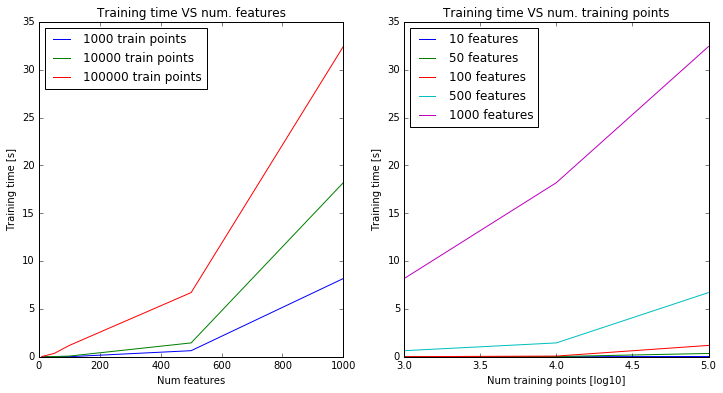

In [6]:
plt.subplot(1, 2, 1)

for n_train in n_train_v:
    X = n_features_v
    y = [np.mean(results['LR'][(n_train, n_features)]['train']) 
         for n_features in n_features_v]
    plt.plot(X, y, label=str(n_train) + " train points")

plt.title('Training time VS num. features')
plt.xlabel('Num features')
plt.ylabel('Training time [s]')
plt.legend(loc=0)


plt.subplot(1, 2, 2)

for n_features in n_features_v:
    X = np.log10(n_train_v)
    y = [np.mean(results['LR'][(n_train, n_features)]['train']) 
         for n_train in n_train_v]
    plt.plot(X, y, label=str(n_features) + " features")

plt.title('Training time VS num. training points')
plt.xlabel('Num training points [log10]')
plt.ylabel('Training time [s]')
plt.legend(loc=0)
plt.show()

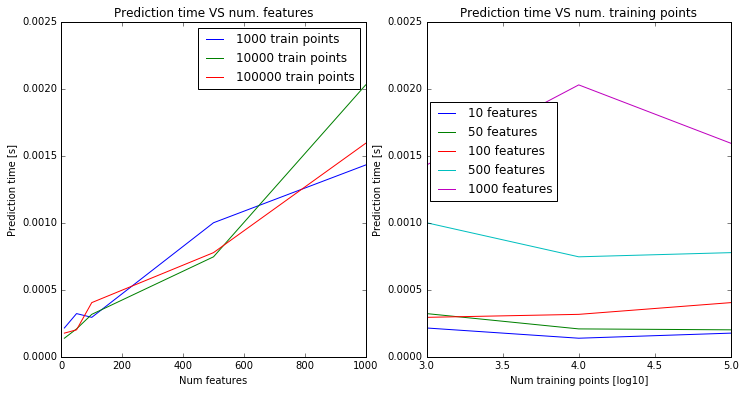

In [7]:
plt.subplot(1, 2, 1)

for n_train in n_train_v:
    X = n_features_v
    y = [np.mean(results['LR'][(n_train, n_features)]['pred']) 
         for n_features in n_features_v]

    plt.plot(X, y, label=str(n_train) + " train points")

plt.title('Prediction time VS num. features')
plt.xlabel('Num features')
plt.ylabel('Prediction time [s]')
plt.legend(loc=0)


plt.subplot(1, 2, 2)

for n_features in n_features_v:
    X = np.log10(n_train_v)
    y = [np.mean(results['LR'][(n_train, n_features)]['pred']) 
         for n_train in n_train_v]

    plt.plot(X, y, label=str(n_features) + " features")

plt.title('Prediction time VS num. training points')
plt.xlabel('Num training points [log10]')
plt.ylabel('Prediction time [s]')
plt.legend(bbox_to_anchor=(0.01, 0.76), loc=2, borderaxespad=0.)
plt.show()

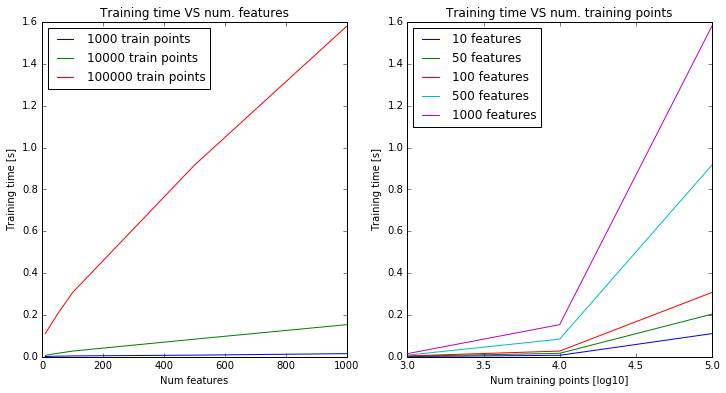

In [8]:
plt.subplot(1, 2, 1)

for n_train in n_train_v:
    X = n_features_v
    y = [np.mean(results['SGD'][(n_train, n_features)]['train']) 
         for n_features in n_features_v]
    plt.plot(X, y, label=str(n_train) + " train points")

plt.title('Training time VS num. features')
plt.xlabel('Num features')
plt.ylabel('Training time [s]')
plt.legend(loc=0)


plt.subplot(1, 2, 2)

for n_features in n_features_v:
    X = np.log10(n_train_v)
    y = [np.mean(results['SGD'][(n_train, n_features)]['train']) 
         for n_train in n_train_v]
    plt.plot(X, y, label=str(n_features) + " features")

plt.title('Training time VS num. training points')
plt.xlabel('Num training points [log10]')
plt.ylabel('Training time [s]')
plt.legend(loc=0)
plt.show()

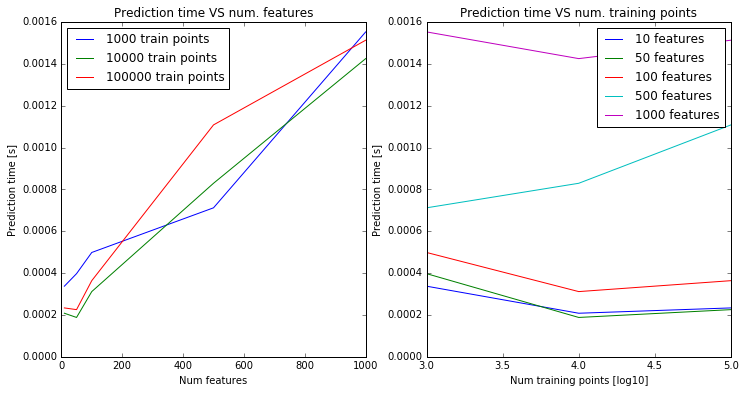

In [9]:
plt.subplot(1, 2, 1)

for n_train in n_train_v:
    X = n_features_v
    y = [np.mean(results['SGD'][(n_train, n_features)]['pred']) 
         for n_features in n_features_v]

    plt.plot(X, y, label=str(n_train) + " train points")

plt.title('Prediction time VS num. features')
plt.xlabel('Num features')
plt.ylabel('Prediction time [s]')
plt.legend(loc=0)


plt.subplot(1, 2, 2)

for n_features in n_features_v:
    X = np.log10(n_train_v)
    y = [np.mean(results['SGD'][(n_train, n_features)]['pred']) 
         for n_train in n_train_v]

    plt.plot(X, y, label=str(n_features) + " features")

plt.title('Prediction time VS num. training points')
plt.xlabel('Num training points [log10]')
plt.ylabel('Prediction time [s]')
plt.legend(loc=0)
plt.show()

In [10]:
gc.collect()

X_train, X_test, y_train, y_test = generate_dataset(2000000, 10000, 100, 10.0)

In [11]:
print("Size of X_train is [GB]:", X_train.size * X_train[0,0].itemsize/1E9)

Size of X_train is [GB]: 1.6


In [12]:
from sklearn.metrics import mean_absolute_error


# Batch learning
regr = SGDRegressor(random_state=101)
tick = time.time()
regr.fit(X_train, y_train)
print("With SGD, after", time.time() - tick ,"seconds")
pred = regr.predict(X_test)
print("the MAE is [log10]:", np.log10(mean_absolute_error(y_test, pred)))

With SGD, after 6.781358003616333 seconds
the MAE is [log10]: -1.24225681333


In [13]:
def get_minibatch(X, y, batch_size):
    # We will shuffle consistently the training observations
    from sklearn.utils import resample
    X, y = resample(X, y, replace=False, random_state=101)
    n_cols = y.shape[0]
    for i in range(int(n_cols/batch_size)):
        yield (X[i*batch_size:(i+1)*batch_size, :], y[i*batch_size:(i+1)*batch_size])
    
    if n_cols % batch_size > 0:
        res_rows = n_cols % batch_size
        yield (X[-res_rows:, :], y[-res_rows:])


plot_x = []
plot_y = []
plot_labels = []

for batch_size in (1000, 10000, 100000):
    regr = SGDRegressor(random_state=101)
    training_time = 0.0
    
    X = []
    y = []
    
    for dataset in get_minibatch(X_train, y_train, batch_size):
        tick = time.time()
        regr.partial_fit(dataset[0], dataset[1])
        training_time += (time.time() - tick)
        pred = regr.predict(X_test)
        # print("With partial_fit SGD, after", training_time ,"seconds")
        # print("the MAE is", mean_absolute_error(y_test, pred))
        X.append(training_time)
        y.append(np.log10(mean_absolute_error(y_test, pred)))
    
    print("Report: Mini-batch size", batch_size)
    print("First output after [s]:", X[0])
    print("First model MAE [log10]:", y[0])
    print("Total training time [s]:", X[-1])
    print("Final MAE [log10]: ", y[-1])
    print()
    
    plot_x.append(X)
    plot_y.append(y)
    plot_labels.append("Batch size: "+str(batch_size))

Report: Mini-batch size 1000
First output after [s]: 0.001277923583984375
First model MAE [log10]: -0.942320304943
Total training time [s]: 1.4939403533935547
Final MAE [log10]:  -1.24036819201

Report: Mini-batch size 10000
First output after [s]: 0.012000083923339844
First model MAE [log10]: -1.23171862851
Total training time [s]: 2.126509666442871
Final MAE [log10]:  -1.24038903474

Report: Mini-batch size 100000
First output after [s]: 0.06749701499938965
First model MAE [log10]: -1.24053929732
Total training time [s]: 1.3549237251281738
Final MAE [log10]:  -1.24053790326



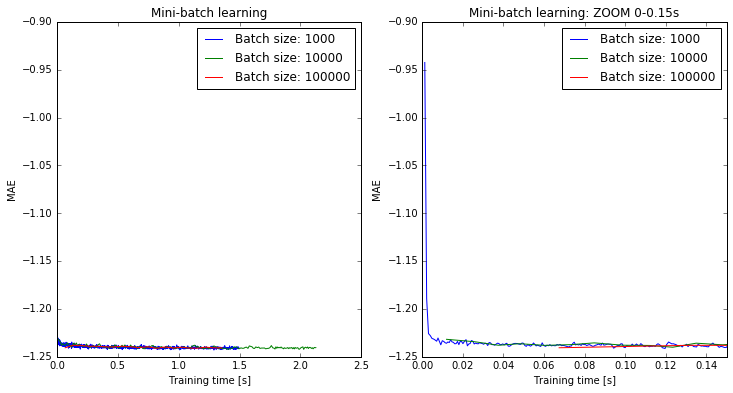

In [14]:
pylab.rcParams['figure.figsize'] = 12, 6

plt.subplot(1,2,1)
for i in range(len(plot_x)):
    plt.plot(plot_x[i], plot_y[i], label=plot_labels[i])
plt.title('Mini-batch learning')
plt.xlabel('Training time [s]')
plt.ylabel('MAE')
plt.legend(loc=0)

plt.subplot(1,2,2)
for i in range(len(plot_x)):
    plt.plot(plot_x[i], plot_y[i], label=plot_labels[i])
plt.title('Mini-batch learning: ZOOM 0-0.15s')
plt.xlabel('Training time [s]')
plt.ylabel('MAE')
plt.xlim([0, 0.15])
plt.legend(loc=0)

plt.show()

In [15]:
# Default figure size
pylab.rcParams['figure.figsize'] = 8, 6

# A real example: Classification

In [16]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import HashingVectorizer

to_remove = ('headers', 'footers', 'quotes')

data_train = fetch_20newsgroups(subset='train', random_state=101,
                                remove=to_remove)

data_test = fetch_20newsgroups(subset='test', random_state=101,
                                remove=to_remove)


labels = data_train.target_names
targets = np.unique(data_train.target)

In [17]:
def get_minibatch_docs(docs, targets, batch_size):
    n_docs = len(docs)
    for i in range(int(n_docs/batch_size)):
        yield (docs[i*batch_size:(i+1)*batch_size], targets[i*batch_size:(i+1)*batch_size])
    
    if n_docs % batch_size > 0:
        res_rows = n_docs % batch_size
        yield (docs[-res_rows:], targets[-res_rows:])

In [18]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import sys

minibatch_size = 1000
values_to_plot = {}

for hash_table_size in (1000, 5000, 10000, 50000, 100000):
    
    values_to_plot[hash_table_size] = {'time': [], 'score': []}

    vectorizer = HashingVectorizer(stop_words='english', non_negative=True,
                                   n_features=hash_table_size, ngram_range=(1, 1))

    X_test = vectorizer.transform(data_test.data)
    y_test = data_test.target

    clf = SGDClassifier(loss='log')
    timings = []

    for minibatch in get_minibatch_docs(data_train.data, data_train.target, minibatch_size):
        y_train = minibatch[1]

        tick = time.time()
        X_train = vectorizer.transform(minibatch[0])
        clf.partial_fit(X_train, y_train, targets)
        
        timings.append(time.time() - tick)
        
        pred = clf.predict(X_test)
        
        values_to_plot[hash_table_size]['score'].append(accuracy_score(y_test, pred))
    
    values_to_plot[hash_table_size]['time'] = np.cumsum(timings)
        

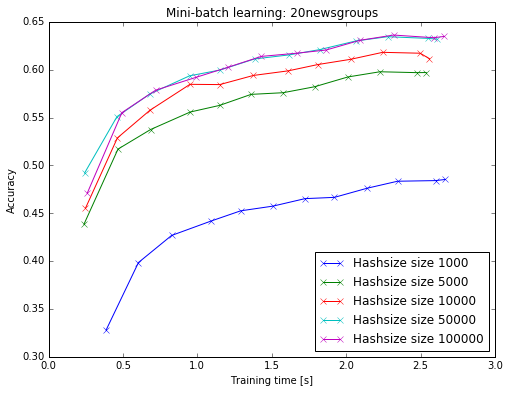

In [19]:
for k,v in sorted(values_to_plot.items()):
    plt.plot(v['time'], v['score'], 'x-', label='Hashsize size '+str(k))
plt.title('Mini-batch learning: 20newsgroups')
plt.xlabel('Training time [s]')
plt.ylabel('Accuracy')
plt.legend(loc=0)

plt.show()

In [20]:
type(X_test)

scipy.sparse.csr.csr_matrix